In [92]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import matplotlib.pyplot as plt

In [22]:
X, y = make_blobs(n_samples=5000, centers=5, n_features=2, cluster_std=2, random_state=42)

In [23]:
np.unique(y)


array([0, 1, 2, 3, 4])

In [24]:
# Convert X and y into pandas DataFrame
X_df = pd.DataFrame(X, columns=['feature1', 'feature2'])
y_df = pd.DataFrame(y, columns=['target'])

In [32]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  5000 non-null   int32
dtypes: int32(1)
memory usage: 19.7 KB


In [29]:
X_df.describe()

feature1     feature2
count  5000.000000  5000.000000
mean     -2.323192     3.118024
std       5.478341     5.968663
min     -15.280360   -13.233517
25%      -7.119947     0.402880
50%      -2.452698     4.439627
75%       2.516295     7.556685
max      11.126065    16.719749

In [30]:
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y_df['target'])
print(y_cat)


[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_cat, test_size=0.2, random_state=42)

In [37]:
model = Sequential()
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(5, activation='softmax'))
model

In [38]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [39]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=0)
history

In [41]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)

32/32 [==============================] - 0s 4ms/step - loss: 0.2511 - accuracy: 0.9020


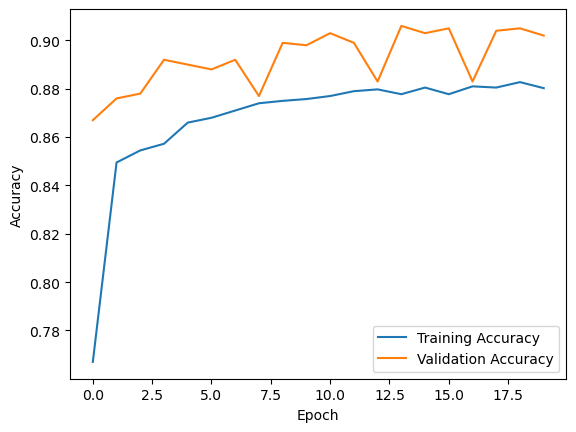

In [43]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#BAGGING ENSEMBLE

In [93]:
X, y = make_blobs(n_samples=50000, centers=5, n_features=2, cluster_std=2, random_state=42)

In [94]:
X_df = pd.DataFrame(X, columns=['feature1', 'feature2'])
y_df = pd.DataFrame(y, columns=['target'])

In [95]:
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y_df['target'])
print(y_cat)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


In [96]:
X_Train, X_Test, Y_Train, Y_test = train_test_split(X_df, y_cat, test_size=0.2, random_state=42)

Ensemble prediction for multi-class classification

In [97]:
def ensemble_predict(models, X):
    predictions = np.zeros((X.shape[0], len(models)))  # Initialize predictions array
    for i, model in enumerate(models):
        model_predictions = model.predict(X)  # Predict class probabilities for each model
        predictions[:, i] = np.argmax(model_predictions, axis=1)  # Store predicted class indices
    aggregated_predictions = np.sum(predictions, axis=1)  # Aggregate predictions across ensemble members
    return aggregated_predictions


Function to train the model

In [103]:


def evaluate_model():
    # Initialize a sequential model
    model = Sequential()
    model = Sequential()
    model.add(Dense(256, input_dim=2, activation='relu'))
    model.add(Dense(5, activation='softmax'))
 
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

Function to evaluate models in ensemble 

In [104]:
def evaluate_ensemble(num_models, X_train, y_train, X_test, y_test):
    models = []
    for _ in range(num_models):

        model = evaluate_model()
        
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
        
        # Evaluate the model on the test data
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        
        models.append(model)
    
    # Make ensemble predictions
    y_pred = ensemble_predict(models, X_test)
    
    # Calculate ensemble accuracy
    ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    
    return ensemble_accuracy


In [105]:
# Evaluate different numbers of ensembles
ensemble_sizes = [1, 2, 3,4]
accuracies = []
for size in ensemble_sizes:
    accuracy = evaluate_ensemble(size, X_Train, Y_Train, X_Test, Y_test)
    accuracies.append(accuracy)  

313/313 [==============================] - 1s 2ms/step


In [106]:
print(accuracies)

[0.8737, 0.1919, 0.1772, 0.2146]


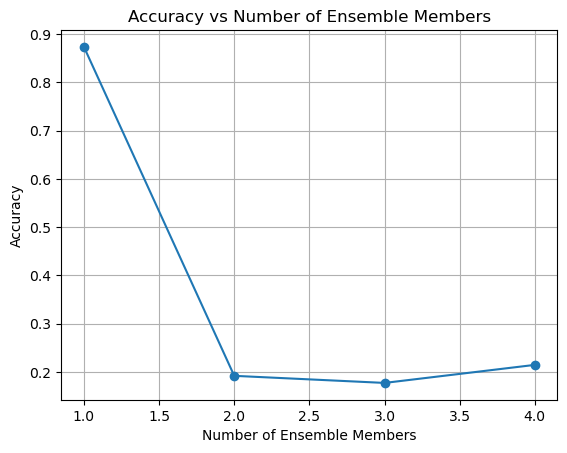

In [107]:
# Plot score vs number of ensemble members
plt.plot(ensemble_sizes, accuracies, marker='o')
plt.xlabel('Number of Ensemble Members')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Ensemble Members')
plt.grid(True)
plt.show()